## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn-bright')
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile("drive/MyDrive/employee_retention.zip") as myzip:
    train = myzip.open("train.csv")
    test = myzip.open("test.csv")
    submission = myzip.open("sample_submission.csv")
train = pd.read_csv(train)
test = pd.read_csv(test)
submission = pd.read_csv(submission)

Посмотрим на данные сотрудников компании

In [ ]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1119 non-null   int64 
 1   Age                       1119 non-null   int64 
 2   BusinessTravel            1119 non-null   object
 3   DailyRate                 1119 non-null   int64 
 4   Department                1119 non-null   object
 5   DistanceFromHome          1119 non-null   int64 
 6   Education                 1119 non-null   int64 
 7   EducationField            1119 non-null   object
 8   EmployeeCount             1119 non-null   int64 
 9   EnvironmentSatisfaction   1119 non-null   int64 
 10  Gender                    1119 non-null   object
 11  HourlyRate                1119 non-null   int64 
 12  JobInvolvement            1119 non-null   int64 
 13  JobLevel                  1119 non-null   int64 
 14  JobRole                 

In [ ]:
print(f'train shape {train.shape}')
print(f'test shape {test.shape}')

train shape (1677, 35)
test shape (1119, 34)


In [ ]:
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

## EDA

### Функции для визуализации данных

Реализуем функцию для визуализации распределения категориальных и количественных признаков 

In [ ]:
def distribution_view(df, features, NROWS, NCOLS, MODE):
    if MODE == 'cont':
  
        fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(18,16))

        for i in range(NCOLS):
          for j in range(NROWS):

            sns.kdeplot(data=df, x=df[features[NCOLS*j+i]],
                        ax=ax[j,i], fill=True,
                        color=color_pal[0])
            sns.kdeplot(data=test, x=test[features[NCOLS*j+i]],
                        ax=ax[j,i], fill=True,
                        color=color_pal[1])
            
            ax[j,i].set_ylabel('')
            ax[j,i].legend(['Train', 'Test'])
            
        fig.suptitle('Распределение количественных признаков')
      
        return
      
    elif MODE == 'cat':

        fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(18,20))

        for i in range(NCOLS):
          for j in range(NROWS):

            sns.countplot(data=df, x=df[features[5*j+i]],
                        ax=ax[j,i])

            
            ax[j,i].set_ylabel('')

            ax[j,i].tick_params(labelsize=5, width=0.1) # масштабирует подписи на осях
        fig.suptitle('Распределение категориальных признаков')
        
        return


In [ ]:
def ploting_cat_features(start, end, df, columns, TARGET='Attrition'):
    
    fig, ax = plt.subplots(ncols=end-start, figsize=(18,5))
    try:
      for i in range(end-start):
          sns.pointplot(data=df, x=columns[i+start], y=TARGET, ax=ax[i])
          ax[i].tick_params(labelsize=10, width=0.2)
    
    except TypeError:
        sns.pointplot(data=df, x=columns[i+start], y=TARGET)
    
    fig.suptitle('Распределение категориальных признаков')
    
    return 
        

### Missing Values

In [ ]:
missing_train = (train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train

Series([], dtype: float64)

In [ ]:
missing_test = (test.isnull().sum() / test.shape[0] * 100).sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
missing_test

Series([], dtype: float64)

Пропусков нет ни тренировочных, ни в тестовых данных

### Continuos and Categorical Data Distribution

По среднестатистическому отклонению можно предположить, какие данные категориальные, какие количественные 

In [ ]:
train.describe().T.sort_values(by='std', ascending=False) \
                .style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
MonthlyRate,1677.000000,14770.048301,7112.203888,636.000000,8509.000000,15332.000000,20990.000000,26999.000000
MonthlyIncome,1677.000000,6196.049493,4520.050754,1010.000000,2875.000000,4834.000000,7403.000000,19973.000000
DailyRate,1677.000000,892.749553,374.496259,107.000000,589.000000,890.000000,1223.000000,3921.000000
HourlyRate,1677.000000,67.798450,19.435928,30.000000,51.000000,69.000000,84.000000,100.000000
Age,1677.000000,36.036971,8.507112,18.000000,30.000000,35.000000,41.000000,60.000000
DistanceFromHome,1677.000000,8.683959,7.826143,1.000000,2.000000,7.000000,12.000000,29.000000
TotalWorkingYears,1677.000000,10.709600,7.255135,0.000000,6.000000,9.000000,14.000000,41.000000
YearsAtCompany,1677.000000,6.806798,5.883282,0.000000,3.000000,5.000000,9.000000,41.000000
YearsInCurrentRole,1677.000000,4.144305,3.583398,0.000000,2.000000,3.000000,7.000000,18.000000
YearsWithCurrManager,1677.000000,4.186643,3.576189,0.000000,2.000000,3.000000,7.000000,17.000000


***StandardHours***, ***EmployeeCount*** - это колонки, которые содержат только одно значение, никакой информации они не несут, поэтому удалим их

***Attrition*** - это переменная, которую надо предсказать.

Есть человек, который проработал 41 год в компании. Посмотрим на этого сотрудника, может быть здесь ошибка в данных

In [ ]:
train[train['TotalWorkingYears'] == 41]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
877,39,Travel_Rarely,682,Research & Development,1,4,Other,1,4,Male,57,4,3,Healthcare Representative,3,Married,7441,20161,1,Y,No,11,3,4,80,1,41,0,3,41,8,12,10,0


Этому сотруднику 39 лет, а работает он 41, скорее всего ошибка в данных, поэтому удалим данную строчку

In [ ]:
train = train[train['TotalWorkingYears'] != 41].copy()

Будем считать категориальными данными, признаки у которых меньше 25 уникальных значений, остальные признаки отнесем к непрерывным

Number of categorical features: 23
Number of continuous features: 8


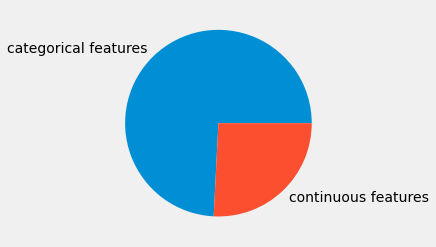

In [ ]:
target = train.Attrition 
cat_features = [col for col in list(train.columns) if train[col].nunique() >=2 and train[col].nunique() < 25]
cont_features = [col for col in list(train.columns) if train[col].nunique() >=25]

print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuous features: {len(cont_features)}')

plt.pie(x=[len(cat_features), len(cont_features)],
        labels=['categorical features', 'continuous features'])
plt.show()

Категориальных данных почти в три раза больше чем непрерывных

### Feature Distribution of Continous Features

Построим графики распределения количественных признаков с помощью функции ***distribution_view***, которую я задал чуть выше

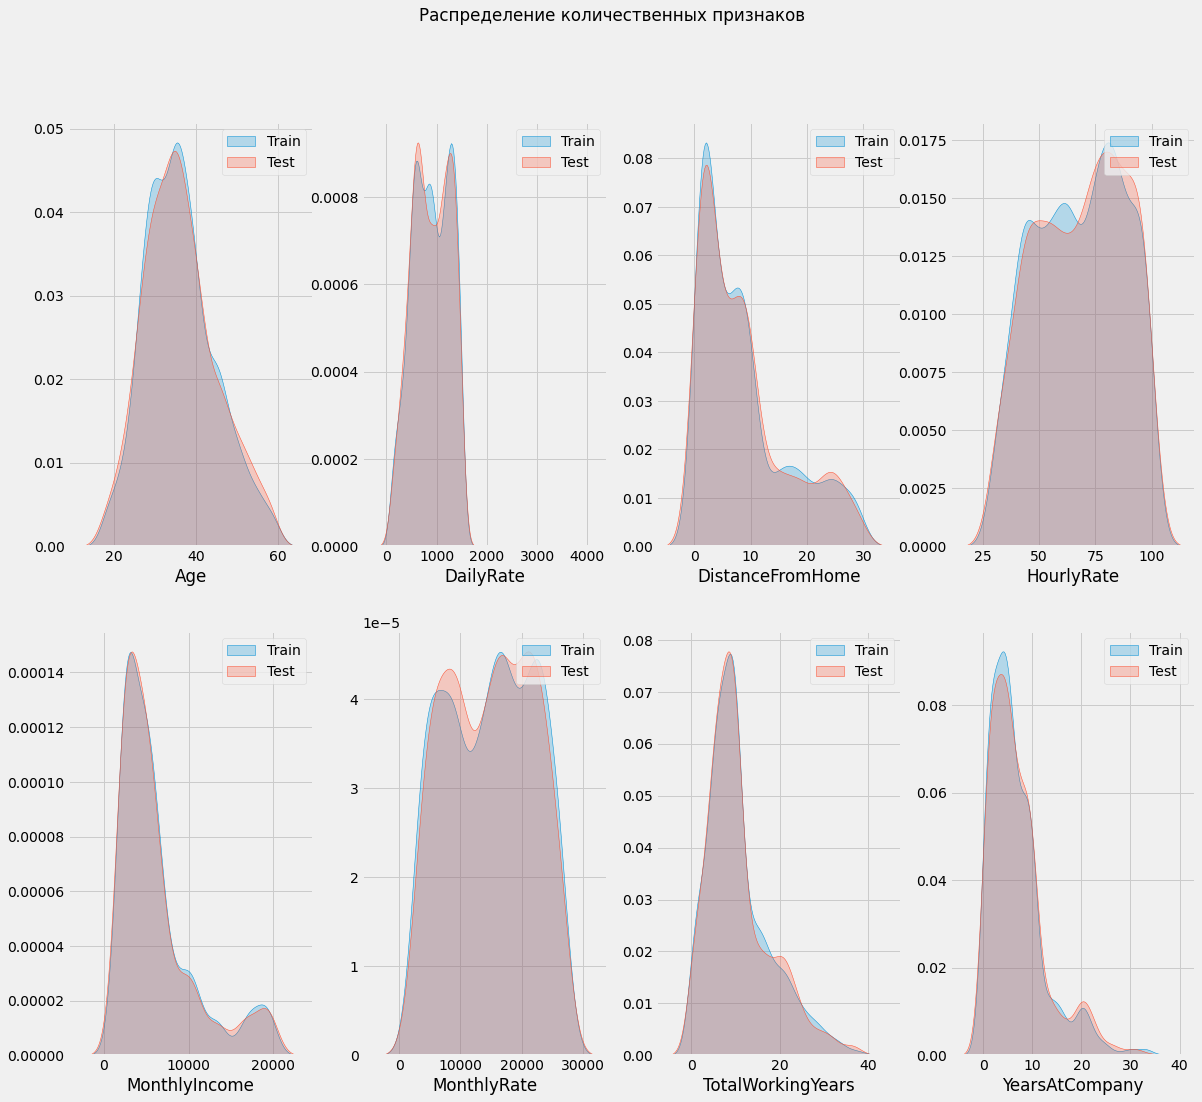

In [ ]:
distribution_view(df=train, features=cont_features, NROWS=2, NCOLS=4, MODE='cont')


Приличную разницу между тренировочными и тестовыми данными можно наблюдать у ***MonthlyRate***

### Feature Distribution of Categorical Features

Теперь изобразим категориальные признаки

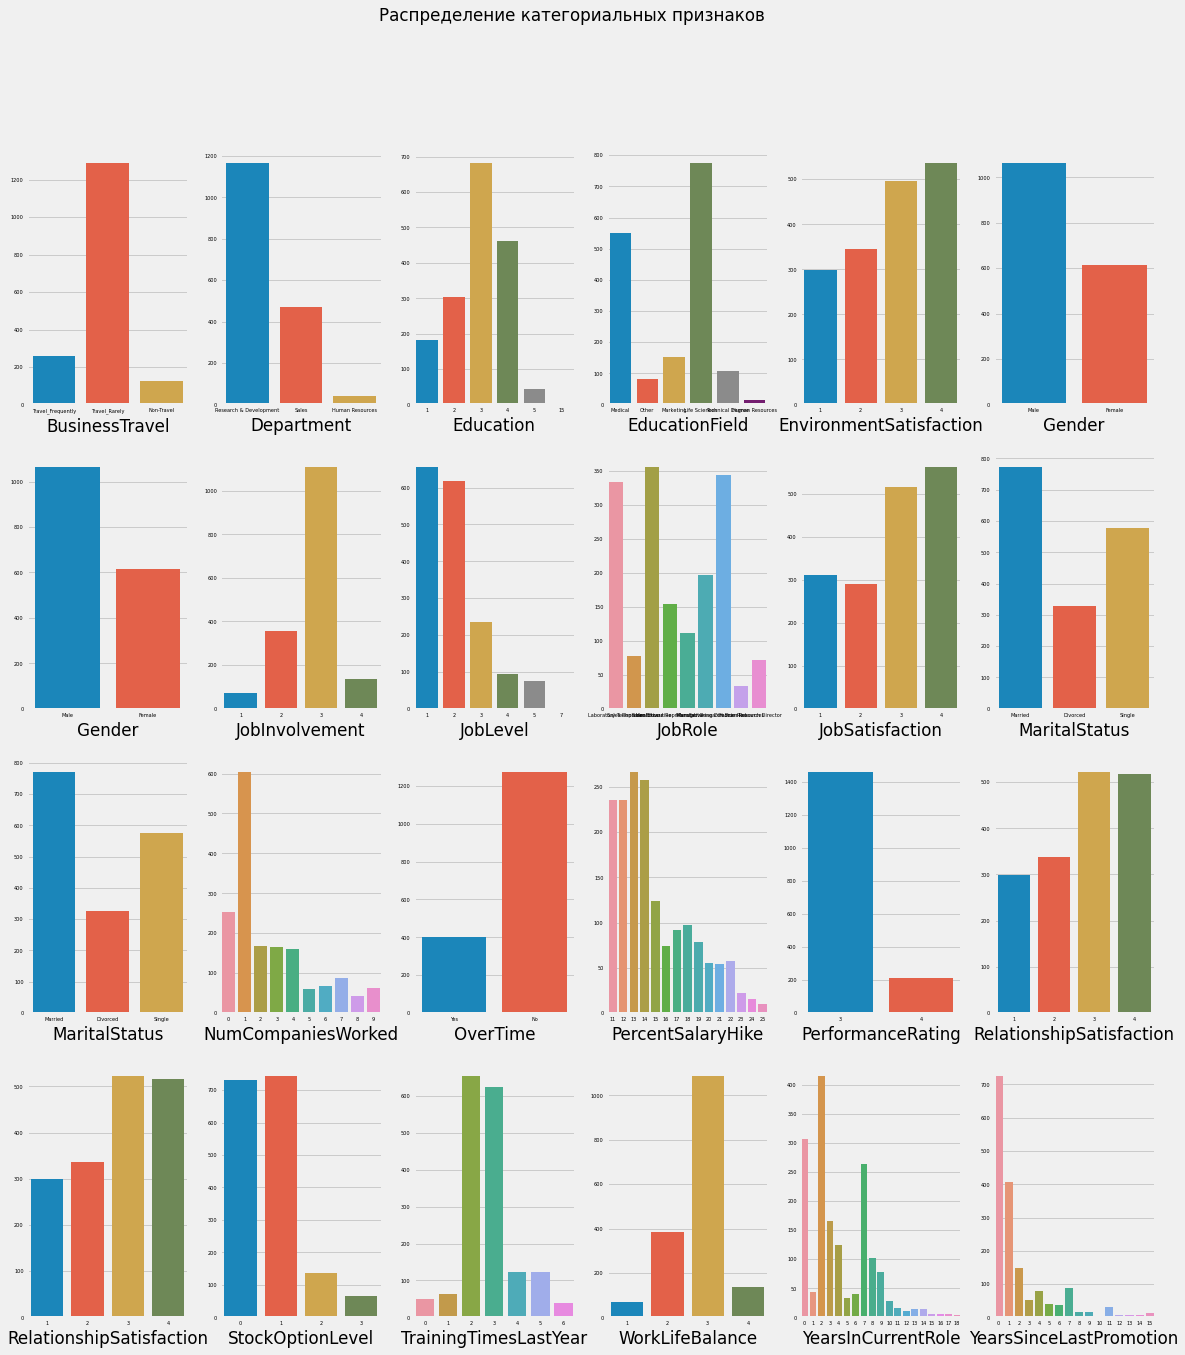

In [ ]:
distribution_view(df=train, features=cat_features, NROWS=4, NCOLS=6, MODE='cat')


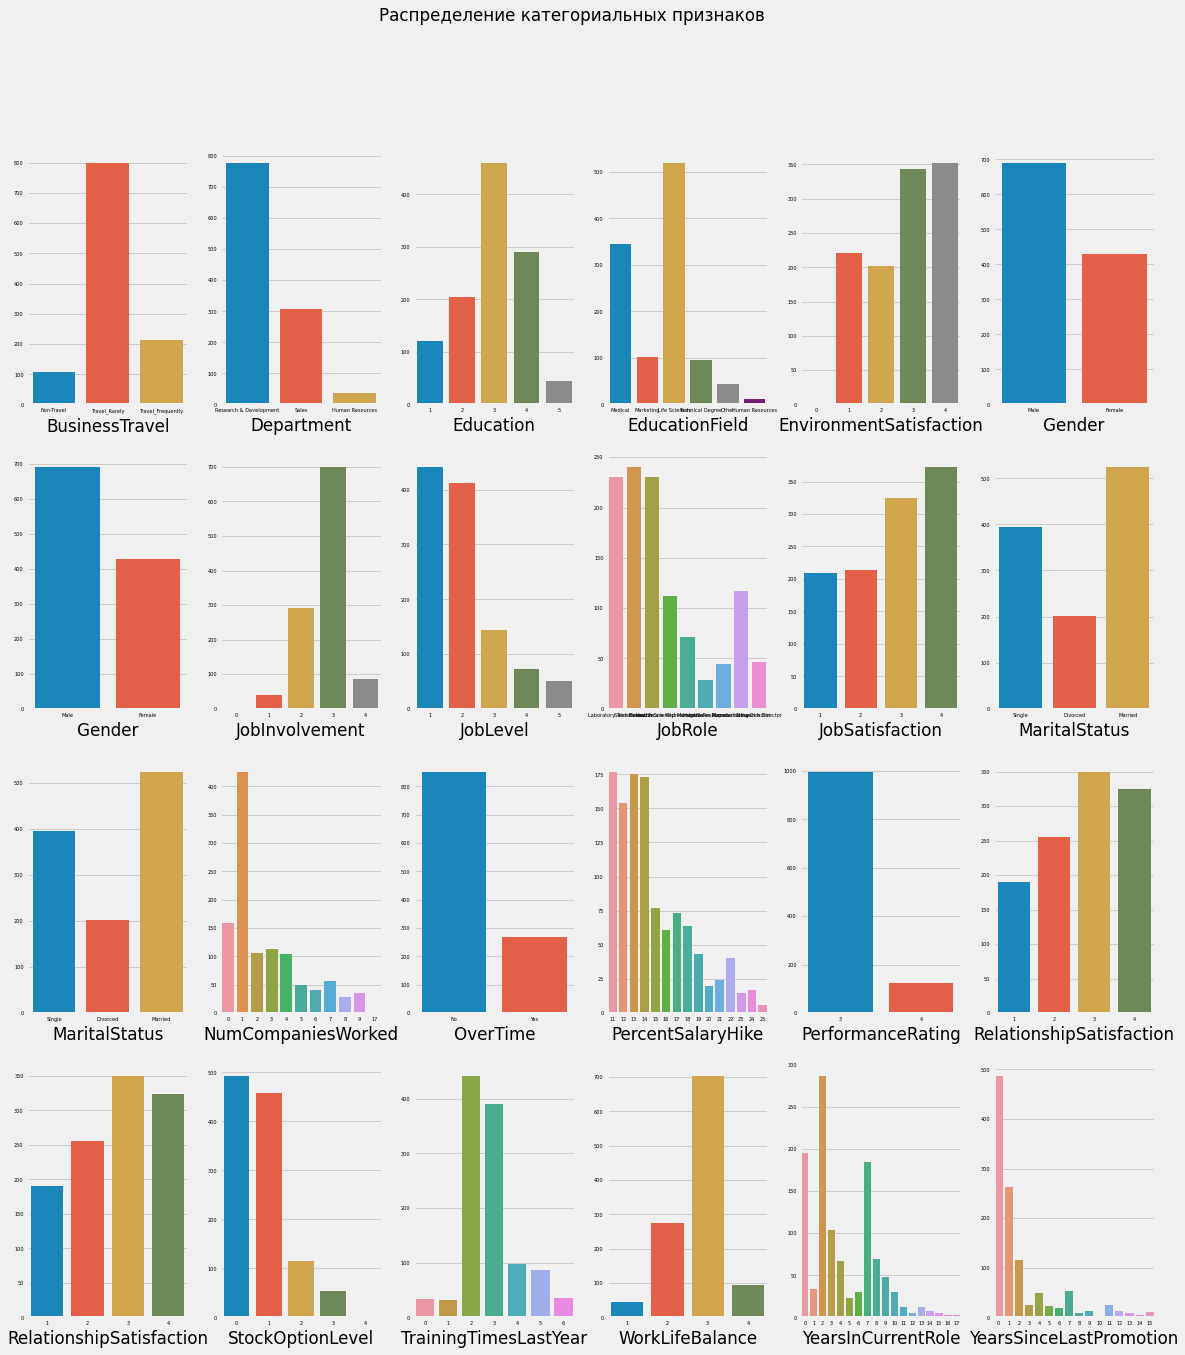

In [ ]:
distribution_view(df=test, features=cat_features, NROWS=4, NCOLS=6, MODE='cat')


### Target Distribution

Теперь же посмотрим на зависимую переменную

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


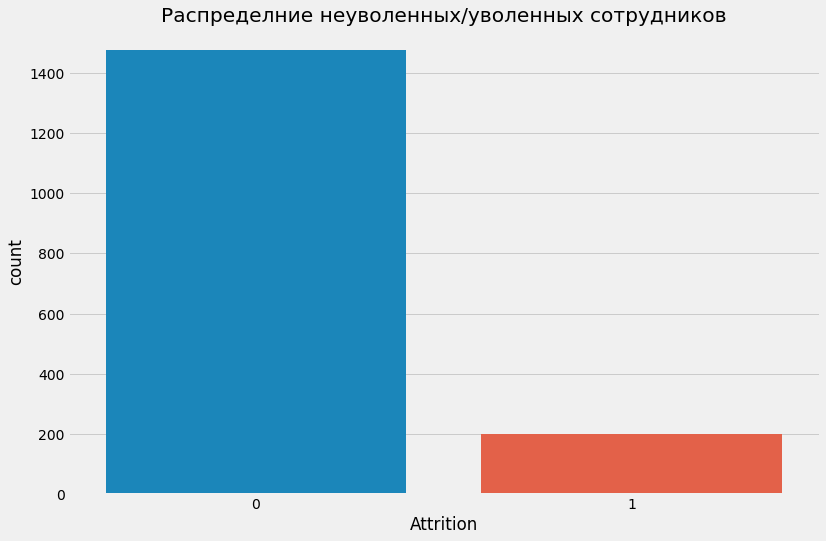

In [ ]:
_, ax = plt.subplots(figsize=(12,8))
sns.countplot(target)
ax.set_title('Распределние неуволенных/уволенных сотрудников')
plt.show()

Несбалансированная выборка, из 1700 сотрудников только 200 уволенных. Учтем это при обучении через кросс-валидацию 

### Data Cleaning and Processing

Удалим ***StandardHour***, ***EmployeeCount***, вследствии того, что они не информативны

In [ ]:
train = train.drop(columns=['StandardHours', 'EmployeeCount'])
test = test.drop(columns=['StandardHours', 'EmployeeCount'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1676
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   BusinessTravel            1676 non-null   object
 2   DailyRate                 1676 non-null   int64 
 3   Department                1676 non-null   object
 4   DistanceFromHome          1676 non-null   int64 
 5   Education                 1676 non-null   int64 
 6   EducationField            1676 non-null   object
 7   EnvironmentSatisfaction   1676 non-null   int64 
 8   Gender                    1676 non-null   object
 9   HourlyRate                1676 non-null   int64 
 10  JobInvolvement            1676 non-null   int64 
 11  JobLevel                  1676 non-null   int64 
 12  JobRole                   1676 non-null   object
 13  JobSatisfaction           1676 non-null   int64 
 14  MaritalStatus           

#### Continuos Feature Processing 

Детально погрузимся в количественные данные

In [ ]:
train.groupby(['Attrition']).mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,36.539295,895.977642,8.617886,2.969512,2.794038,68.072493,2.815041,2.052846,2.816396,6406.351626,14780.754743,2.542005,14.945799,3.126016,2.78523,0.776423,11.059621,2.742547,2.780488,7.058943,4.317751,2.014905,4.346883
1,32.315000,869.980000,9.210000,2.700000,2.485000,65.830000,2.535000,1.595000,2.610000,4637.795000,14664.080000,2.825000,14.610000,3.140000,2.49500,0.315000,7.975000,2.675000,2.690000,4.775000,2.845000,1.660000,2.975000


Интересный вывод можно сделать исходя из этой сводной таблицы. 

Уволенные сотрудники в среднем помладше, дальше живут от работы и зарплаты у них меньше. То есть в основном это сотрудники среднего-младшего звена 

Посмотрим наличие выбросов в количественных признаках

In [3]:
NROWS = 2
NCOLS = 4
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(15, 8))

for i in range(NCOLS):
    for j in range(NROWS):

        sns.boxplot(x='Attrition', y=train[cont_features[2*i+j]],
                    ax=ax[j, i], hue='Attrition', data = train)
        ax[j, i].set_xlabel(f'{cont_features[2*i+j]}')
        plt.grid()
        
plt.show()

NameError: ignored

В столбце "Дневная норма" присутствует выброс, от него избавимся


In [ ]:
train[train['DailyRate']>2000]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1398,44,Travel_Frequently,3921,Research & Development,1,3,Life Sciences,4,Male,73,1,3,Healthcare Representative,4,Married,7336,7439,3,Y,No,12,3,2,1,24,3,3,20,10,3,10,0


In [ ]:
train = train[train['DailyRate']<3000].copy()

Удалили выброс 

In [ ]:
train.duplicated().sum()

0

Повторных строк в данных нет

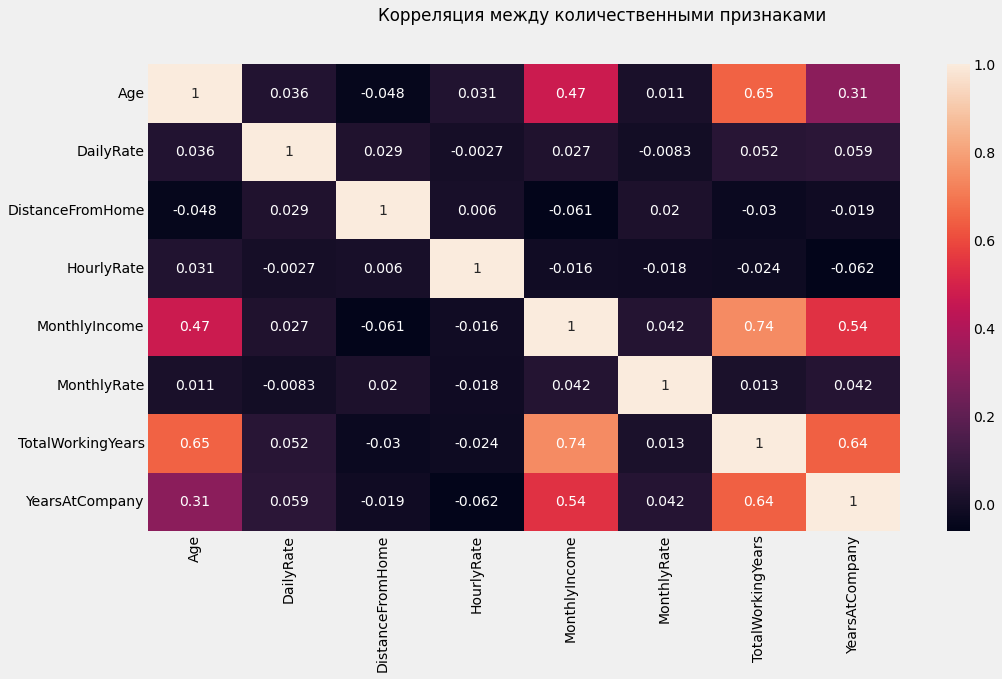

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(train[cont_features].corr(), annot=True)
plt.suptitle('Корреляция между количественными признаками')
plt.show()

Сильная линейная связь между зарплатой  и стажом работы, а также с годами проведенными в данной компании.

Удалим столбец ***TotalWorkingYears***, чтобы не было мультиколлинеарности 

In [ ]:
train = train.drop(columns=['TotalWorkingYears'])
test = test.drop(columns=['TotalWorkingYears'])

In [ ]:
new_cont_features = [col for col in cont_features if col != 'TotalWorkingYears']

Рассмотрим парную зависимость между количественными признаками

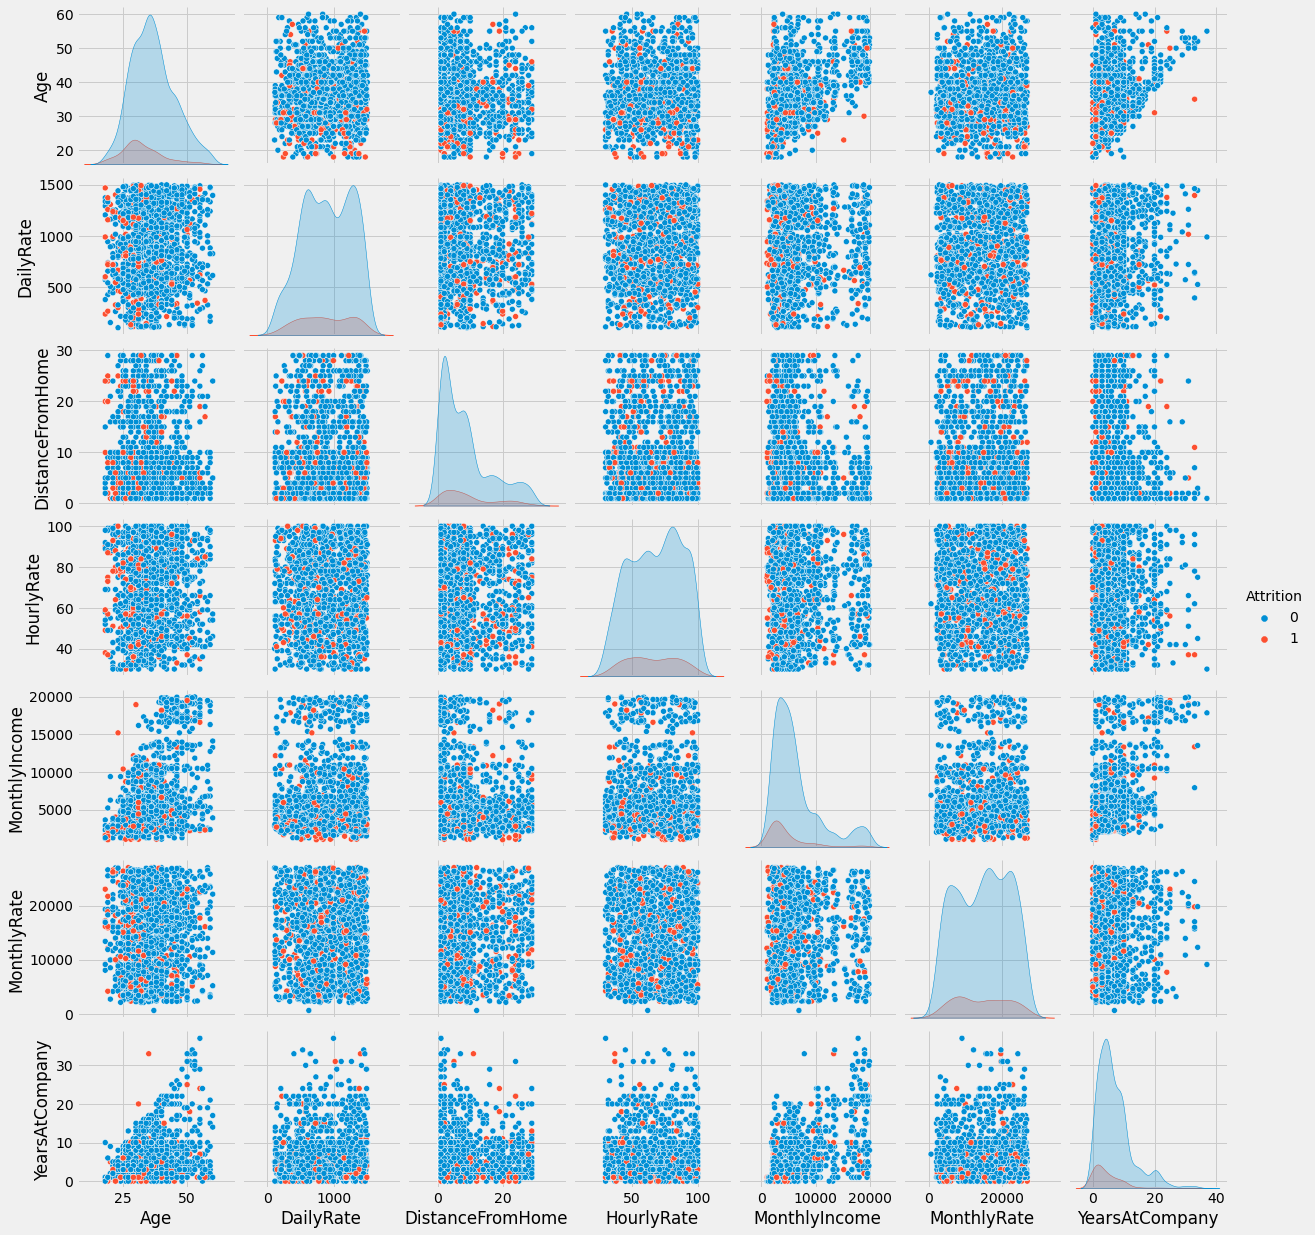

In [ ]:
cont_data = train[new_cont_features + ['Attrition']]
sns.pairplot(cont_data, hue='Attrition')
plt.show()

Практически везде уволенные сотрудники распределены равномерно

#### Categorical Feature Processing 

Взглянем подробнее на категориальные признаки 

In [ ]:
cat_features = [col for col in cat_features if col != 'Attrition']
len(cat_features)

22

Построим графики, которые отобразят значение тагрета в зависимости от распределения категориальных признаков 

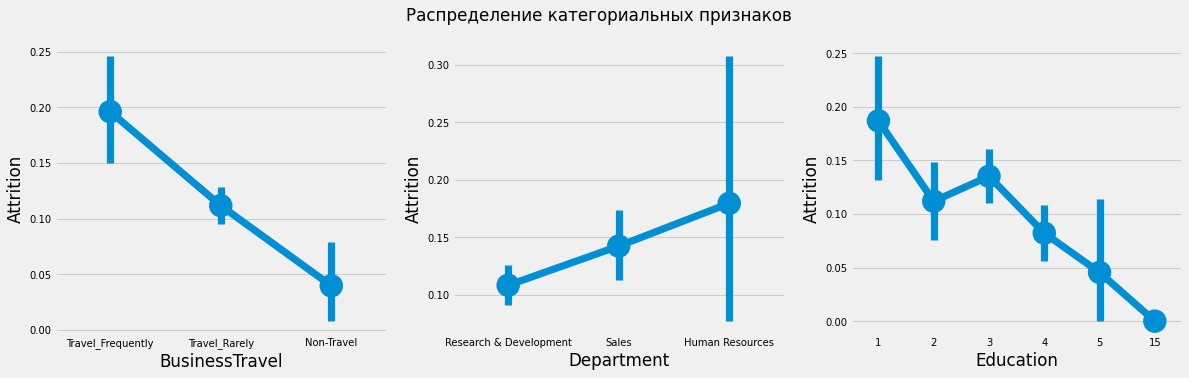

In [ ]:
ploting_cat_features(start=0, end=3, df=train, columns=cat_features)

Увольняются чаще сотрудники, которые часто ездят на командировки, а также видно, как падает вероятность увольнения от увеличения уровня образования. Единственное, вызывает вопрос, что значит 15 в  уровне образования 

In [ ]:
train['Education'].value_counts()

3     681
4     463
2     304
1     182
5      44
15      1
Name: Education, dtype: int64

In [ ]:
test['Education'].value_counts()

3    460
4    291
2    204
1    120
5     44
Name: Education, dtype: int64

У одного сотрудника уровень образования равен 15, скорее всего это ошибка, поэтому перепишем вместо 15 уровня 5 уровень.

In [ ]:
train['Education'] = train['Education'].replace([15], 5)
train['Education'].value_counts()

3    681
4    463
2    304
1    182
5     45
Name: Education, dtype: int64

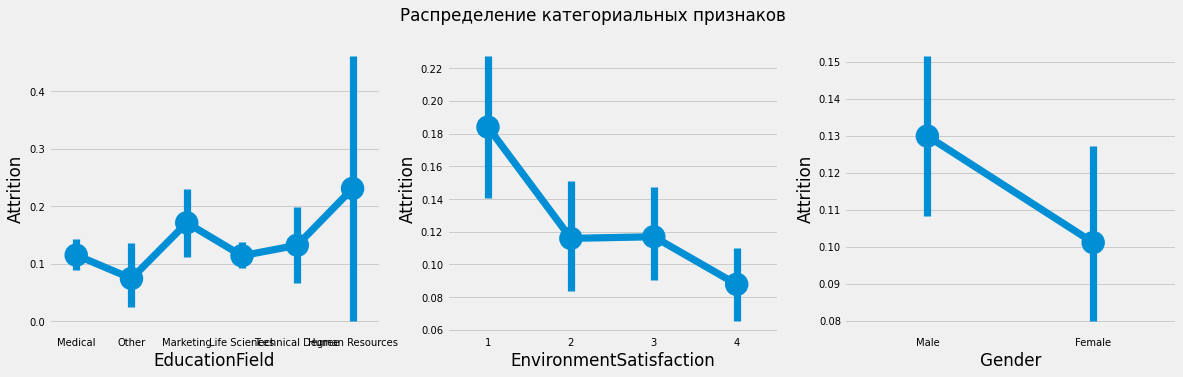

In [ ]:
ploting_cat_features(start=3, end=6, df=train, columns=cat_features)


Мужчины чуть больше подвержены увольнениям, хотя не думаю, что это статистически значимо. 

Отметим, что люди, у которых низкий уровень удовлетворения окружающей средой (наверное атмосфера в коллективе и роль сотрудника в коллективе) больше склонны увольняться

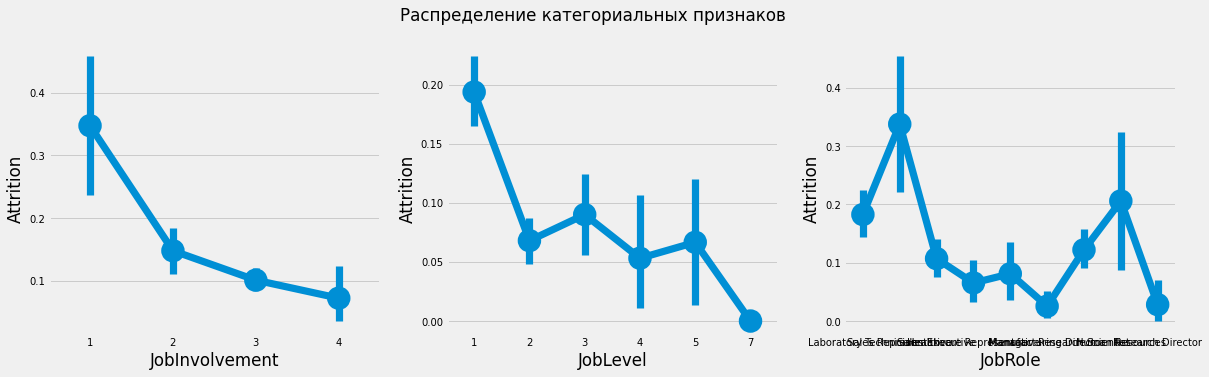

In [ ]:
ploting_cat_features(start=6, end=9, df=train, columns=cat_features)


Логичный вывод, что сотрудник больше задейственный на работе реже увольняется

In [ ]:
train.groupby(['JobLevel']).agg({'Age':'mean','JobLevel': 'count','YearsAtCompany':'mean'}) \
                           .rename(columns={'JobLevel': 'Count of Employee'}) \
                           .sort_values(by='Age', ascending=False)

,Age,Count of Employee,YearsAtCompany
JobLevel,,,
5,47.720000,75,15.120000
4,45.648936,94,13.925532
3,38.527897,233,8.892704
2,36.094003,617,6.912480
1,32.372519,655,3.917557
7,30.000000,1,8.000000


Чем выше уровень работы (отдел старше), тем взрослее в среднем сотрудник, то есть между колонками есть положительная линейная связь. Есть один 30-летний сотрудник, у которого седьмой уровень 

In [ ]:
train[train['JobLevel'] == 7]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1535,30,Travel_Rarely,583,Research & Development,6,3,Life Sciences,4,Female,100,3,7,Manufacturing Director,3,Single,5326,22490,3,Y,No,13,3,4,0,1,2,8,7,1,5,0


Это директор по производству с восьмилетним стажем. Посмотрим на других директоров по производству

In [ ]:
train[train['JobRole']=='Manufacturing Director'].groupby('JobLevel') \
                                                 .agg({'JobLevel':'count','Age': 'mean',
                                                       'YearsAtCompany':'mean','MonthlyIncome': 'mean'}) \
                                                 .rename(columns={'JobLevel': 'Count of employee in level'})

,Count of employee in level,Age,YearsAtCompany,MonthlyIncome
JobLevel,,,,
2,137,35.540146,6.518248,5532.021898
3,52,38.442308,9.076923,8954.192308
4,6,43.333333,15.666667,14106.833333
7,1,30.000000,8.000000,5326.000000


По данной сводной таблице можно предположить, что у данного сотрудника 2 уровень (он ближе всего по характеристикам)

In [ ]:
train['JobLevel'] = train['JobLevel'].replace([7], 2)
train['JobLevel'].value_counts()

1    655
2    618
3    233
4     94
5     75
Name: JobLevel, dtype: int64

In [ ]:
train.groupby(['JobRole']).agg({'Attrition':'mean','JobRole': 'count'}) \
                          .rename(columns={'JobRole': 'Count of Employee'}) \
                          .sort_values(by='Attrition', ascending=False)


,Attrition,Count of Employee
JobRole,,
Sales Representative,0.337662,77
Human Resources,0.205882,34
Laboratory Technician,0.182635,334
Research Scientist,0.122093,344
Sales Executive,0.107042,355
Manager,0.081081,111
Healthcare Representative,0.065359,153
Research Director,0.028169,71
Manufacturing Director,0.025510,196


У торговых представителей есть проблема текучки кадров

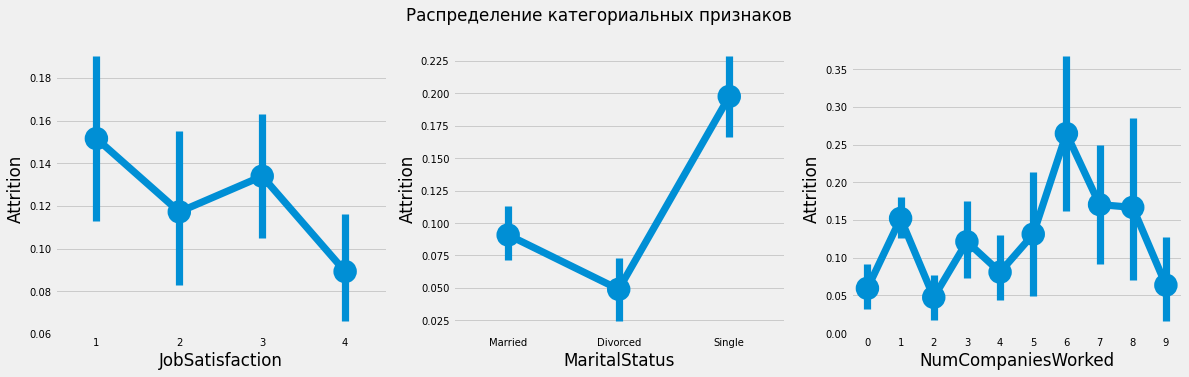

In [ ]:
ploting_cat_features(start=9, end=12, df=train, columns=cat_features)


Интересное наблюдение:

Люди в разводе реже увольняются в отличии от людей, не состоявших в браке. Причиной могут быть алименты или другие социальные выплаты, которые приходится делать людям в разводе, поэтому они больше держаться за работу  

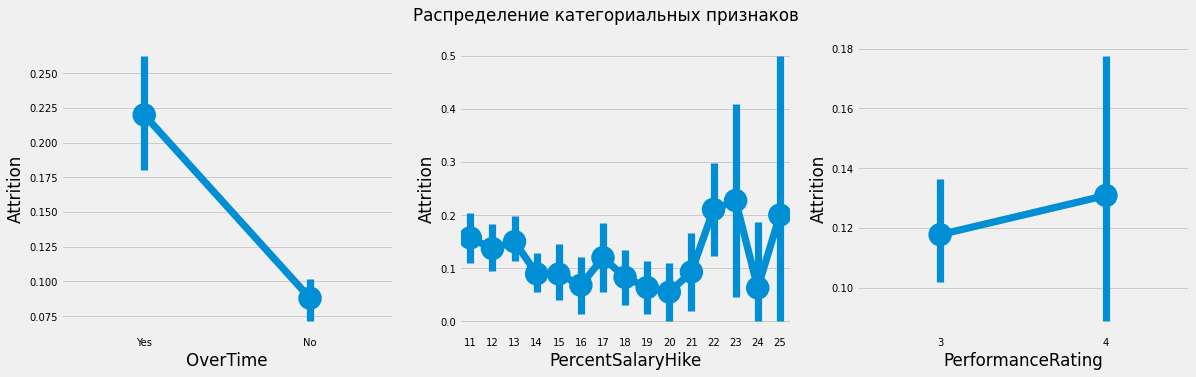

In [ ]:
ploting_cat_features(start=12, end=15, df=train, columns=cat_features)


Не совсем понимаю, что значит ***OverTime*** колонка, но она значимо влияет на увольнение сотрудников. А вот рейтинг проделанной работы, по сути никакой информации не дает. В дальнейшем от него можно избавиться

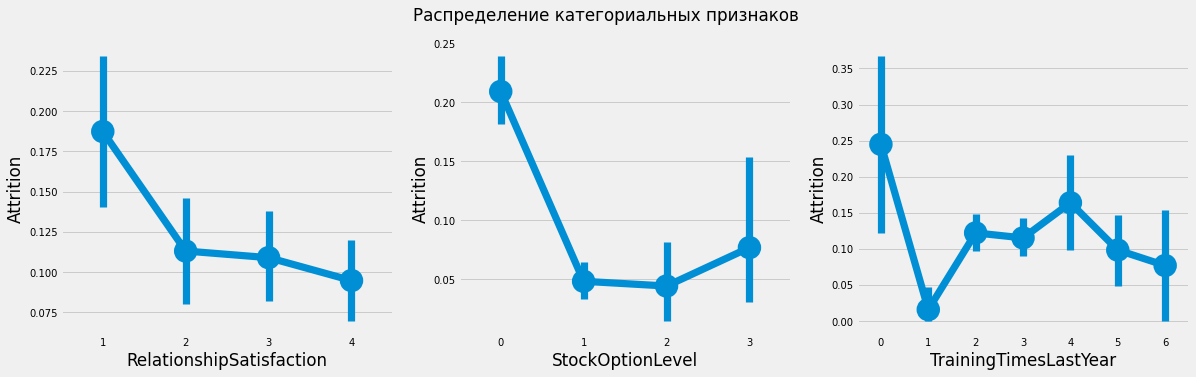

In [ ]:
ploting_cat_features(start=15, end=18, df=train, columns=cat_features)


Низкий уровень ***StockOptionLevel***, также может говорить о том, почему сотрудник увольняется, ну и люди у которых есть проблемы в личных отношениях, больше увольняются. Посмотрим на взаимосвязь между колонкой ***RelationshipSatisfaction*** и ***MaritalStatus***

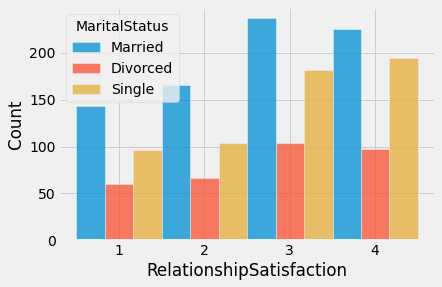

In [ ]:
train['RelationshipSatisfaction'] = train['RelationshipSatisfaction'].astype('category')


sns.histplot(binwidth=1,
            x='RelationshipSatisfaction',
            hue='MaritalStatus',
            data=train,
            stat="count",
            multiple="dodge")
plt.show()

Какой то интересной взаимосвязи между наличием штампом в паспорте и взаимоотношениями в личной жизни у сотрудников нет. 

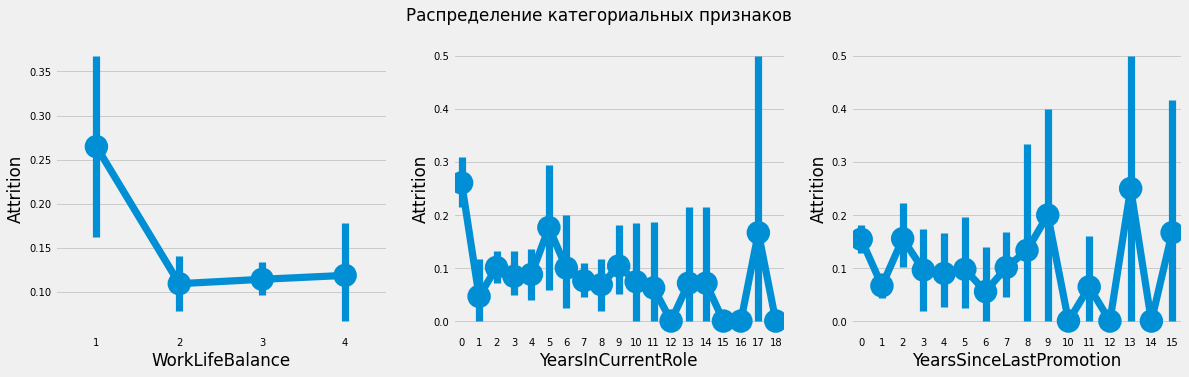

In [ ]:
ploting_cat_features(start=18, end=21, df=train, columns=cat_features)


Сотрудники не соблюдающие баланс между жизнью и работой чаще увольняются, вполне возможно, что у них перегорание

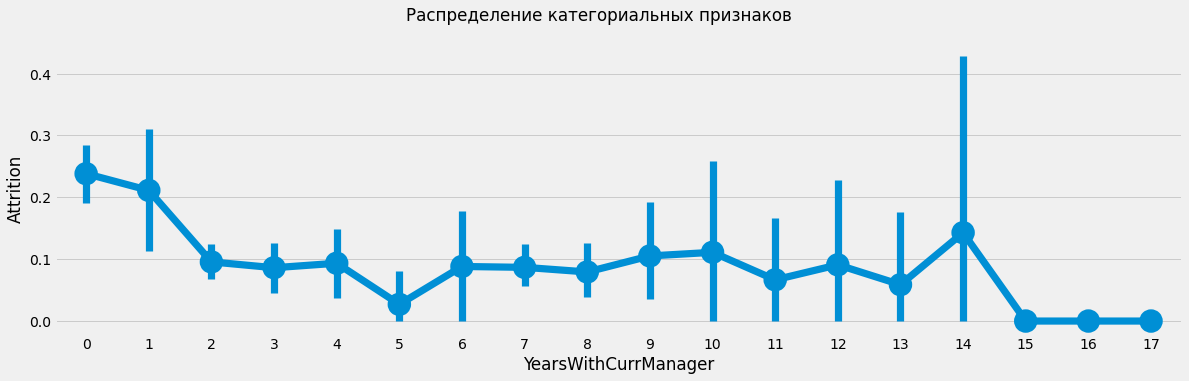

In [ ]:
ploting_cat_features(start=21, end=22, df=train, columns=cat_features)


Колнки для удаления:


*   PerfomanceRating






#### Spearman Correlation With All Features  

Посмотрим на корреляцию между всеми признаками

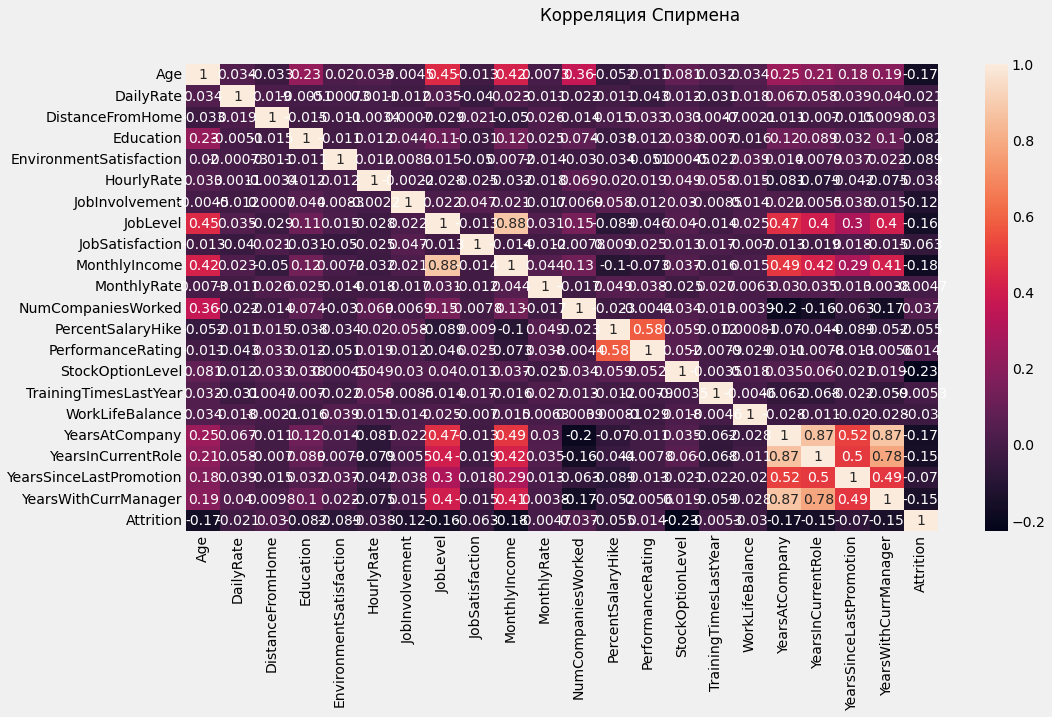

In [ ]:
corr_matrix = train.corr(method='spearman')

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(data=corr_matrix, annot=True, ax=ax)

fig.suptitle('Корреляция Спирмена')
plt.show()

Сильняя линейная связь между ***JobLevel*** и ***MonthlyIncome***, а также между ***YearsInCurrentRole***, ***YearsAtCompany*** а также ***YearsWithCurrManager***. Оставим только ***YearsAtCompany***, чтобы избавиться от мультиколлинеарности между столбцами

In [ ]:
train.drop(columns=['YearsInCurrentRole', 'YearsAtCompany', 'MonthlyIncome', 'Over18'], inplace=True)
test.drop(columns=['YearsInCurrentRole', 'YearsAtCompany', 'MonthlyIncome', 'Over18'], inplace=True)

In [ ]:
cat_features = [col for col in cat_features if col not in  ['YearsInCurrentRole', 'YearsAtCompany', 'MonthlyIncome']]

#### Encoding Categorical Features

Закодируем все категорильные признаки

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

enc = OrdinalEncoder()
# encoder = LabelEncoder()

train[cat_features] = enc.fit_transform(train[cat_features])
test[cat_features] = enc.fit_transform(test[cat_features])


In [ ]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,1.0,599,1.0,24,2.0,3.0,3.0,1.0,42,2.0,0.0,2.0,3.0,1.0,5099,1.0,1.0,2.0,0.0,1.0,1.0,2.0,2.0,7.0,8.0,0
1,35,2.0,921,2.0,8,2.0,4.0,0.0,1.0,46,2.0,0.0,8.0,0.0,1.0,10778,1.0,0.0,6.0,0.0,3.0,1.0,3.0,2.0,0.0,3.0,0
2,32,2.0,718,2.0,26,2.0,2.0,2.0,1.0,80,2.0,1.0,7.0,3.0,0.0,16495,0.0,0.0,6.0,0.0,3.0,2.0,3.0,2.0,1.0,2.0,0
3,38,2.0,1488,1.0,2,2.0,3.0,2.0,0.0,40,2.0,1.0,0.0,0.0,1.0,13384,3.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0
4,50,2.0,1017,1.0,5,3.0,3.0,1.0,0.0,37,2.0,4.0,3.0,0.0,2.0,19805,1.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,4.0,10.0,1


In [ ]:
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (1675, 27)
test shape: (1119, 26)


## Modelling

Обучим модели ***LGBMClassifier*** , ***CatBoostClassifier*** и ***XGBClassifier*** на 5 фолдах. Разделение данных сделаем с помощью ***StratifiedKFold***

In [ ]:
# pip install catboost ### Раскоментить и выполнить 

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

import time

In [ ]:
RANDOM_STATE = 42
N_FOLDS = 5
FEATURES = [col for col in train.columns if col != 'Attrition']
TARGET = 'Attrition'

Напишем функцию в которой мы будем разбивать все данные и обучать различные модели. Будем выводить ***ROC-AUC*** метрику на каждом фолде валидационных данных. Функция будет возвращать скор на 5 фолдах, а также ***feature_importances*** каждой деревянной модели

In [ ]:
def training_model(MODEL, model_params:dict, data, FEATURES:list, TARGET:str, cv, N_folds:int, random_state:int):
    scores = []
    skf = cv(n_splits=N_folds, shuffle=True, random_state=random_state)

    for fold, (train_index, test_index) in enumerate(skf.split(data[FEATURES], data[TARGET])):

        print(10 * '=', f'FOLD = {fold + 1}', 10 * '=')
        start_time = time.time()

        X_train, X_valid = data.iloc[train_index][FEATURES], data.iloc[test_index][FEATURES]
        y_train, y_valid = data[TARGET].iloc[train_index], data[TARGET].iloc[test_index]

        model = MODEL(**model_params)
        model.fit(X_train, y_train, verbose=0)

        preds = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, preds)
        scores.append(auc)

        run_time = time.time() - start_time
        print(f'FOLD = {fold}, ROC_AUC = {auc:.2f}, TIME = {run_time:.2f}s')
    
    print(30*'=')
    print(f'Mean AUC_ROC SCORE: {np.mean(scores):.2f}')
    return (scores, model.feature_importances_)

Напишем функцию, которая отобразит влияние каждого признака на предсказание таргета

In [ ]:
def show_importance(FEATURES:list, feature_importances:np.array, figsize:set, model_name:str):
    feature_importances_df = pd.DataFrame(index=FEATURES,
                       data=feature_importances,
                       columns=['importances'])

    feature_importances_df.sort_values(by='importances', ascending=False).plot(kind='barh', figsize=figsize,
                                                            title=f'Важность признаков для модели {model_name}')
    plt.show()
    return

### LGBM Classifier

Обучим для начала LGBM Classifier, кол-во деревьев везде поставим 1000.

In [ ]:
lgbm_params = {'learning_rate': 0.1,
               'objective': 'binary',
               'metric' : 'auc',
               'n_estimators' : 1000,
               'random_state': RANDOM_STATE
              #  'is_unbalance' : True,
               }

result_lgbm = training_model(MODEL=LGBMClassifier, model_params=lgbm_params,
                             data=train, FEATURES=FEATURES, TARGET=TARGET,
                             cv=StratifiedKFold, N_folds=N_FOLDS, random_state=RANDOM_STATE)


========== FOLD = 1 ==========
FOLD = 0, ROC_AUC = 0.73, TIME = 0.82s
========== FOLD = 2 ==========
FOLD = 1, ROC_AUC = 0.78, TIME = 0.81s
========== FOLD = 3 ==========
FOLD = 2, ROC_AUC = 0.79, TIME = 0.77s
========== FOLD = 4 ==========
FOLD = 3, ROC_AUC = 0.81, TIME = 0.90s
========== FOLD = 5 ==========
FOLD = 4, ROC_AUC = 0.80, TIME = 3.95s
Mean AUC_ROC SCORE: 0.78


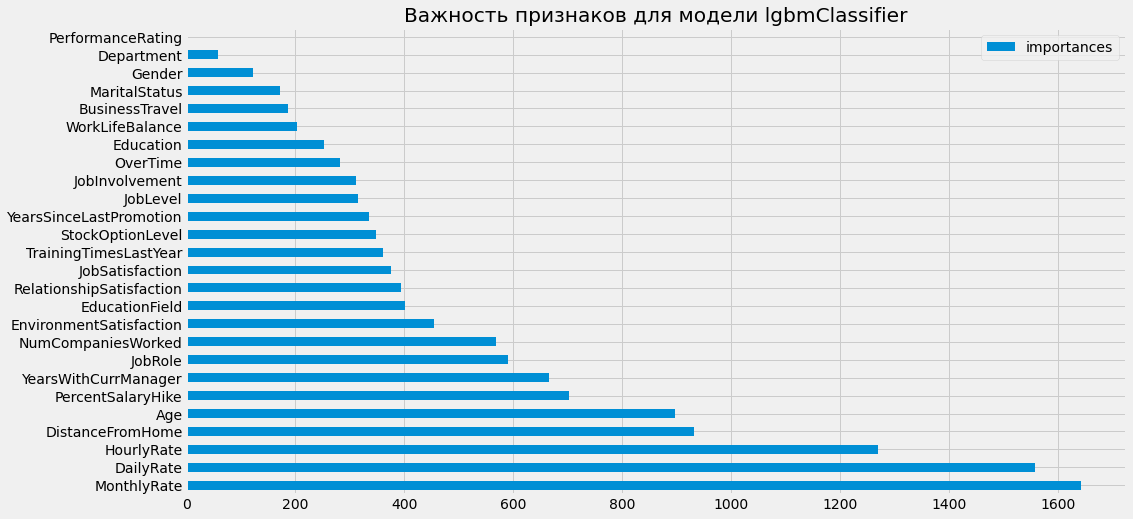

In [ ]:
show_importance(FEATURES=FEATURES, feature_importances = result_lgbm[1],
                figsize=(15,8), model_name='lgbmClassifier')

***PerformanceRating*** как и ожидалось ничего не вносит в модель. Отметим какой небольшой вклад в предсказание модели вносят категориальные признаки 

### XGB Classifier

Теперь обучим XGB Classifier на тех же параметрах

In [ ]:
xgb_params = {'learning_rate': 0.1,
               'objective': 'binary:logistic',
               'eval_metric' : 'auc',
               'n_estimators' : 1000,
               'seed': RANDOM_STATE}

result_xgb = training_model(MODEL=XGBClassifier, model_params=xgb_params,
                            data=train, FEATURES=FEATURES, TARGET=TARGET,
                            cv=StratifiedKFold, N_folds=N_FOLDS, random_state=RANDOM_STATE)


========== FOLD = 1 ==========
FOLD = 0, ROC_AUC = 0.75, TIME = 5.11s
========== FOLD = 2 ==========
FOLD = 1, ROC_AUC = 0.77, TIME = 4.52s
========== FOLD = 3 ==========
FOLD = 2, ROC_AUC = 0.80, TIME = 9.32s
========== FOLD = 4 ==========
FOLD = 3, ROC_AUC = 0.81, TIME = 2.04s
========== FOLD = 5 ==========
FOLD = 4, ROC_AUC = 0.79, TIME = 2.05s
Mean AUC_ROC SCORE: 0.78


Обучается чуть дольше, скор такой же

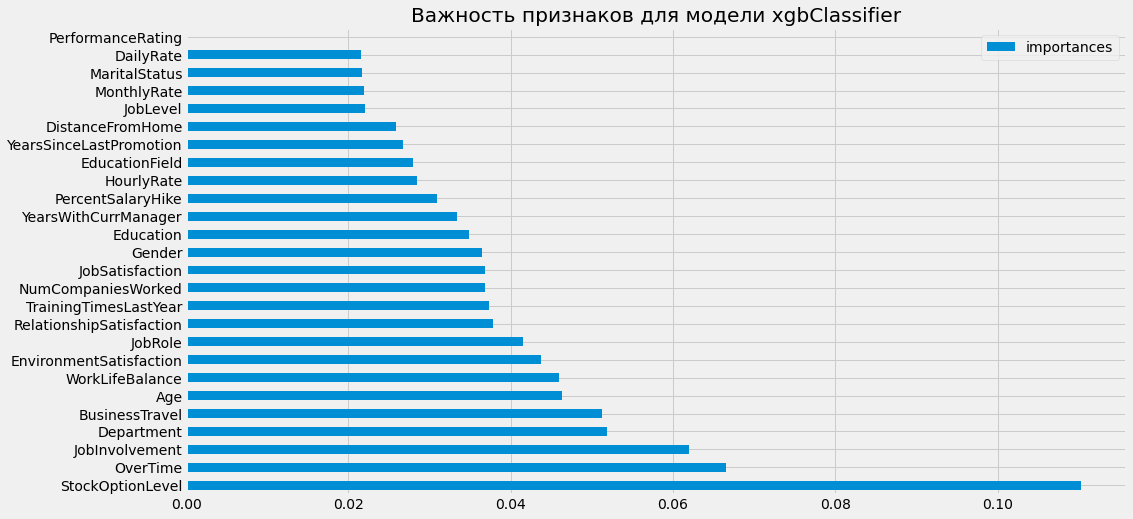

In [ ]:
show_importance(FEATURES=FEATURES, feature_importances = result_xgb[1], figsize=(15,8), model_name='xgbClassifier')


Здесь распределение фич более равномерное, хотя в глаза попадаются ***StockOptionLevel*** и ***PerformanceRating***

### CatBoost Classifier

Остался Катбуст родной

In [ ]:
catb_params = {
    "objective": "Logloss",
    "iterations": 1000,
    "eval_metric": "AUC",
    "random_seed": RANDOM_STATE}

result_catb = training_model(MODEL=CatBoostClassifier, model_params=catb_params,
                            data=train, FEATURES=FEATURES, TARGET=TARGET,
                            cv=StratifiedKFold, N_folds=N_FOLDS, random_state=RANDOM_STATE)


========== FOLD = 1 ==========
FOLD = 0, ROC_AUC = 0.75, TIME = 1.90s
========== FOLD = 2 ==========
FOLD = 1, ROC_AUC = 0.77, TIME = 1.81s
========== FOLD = 3 ==========
FOLD = 2, ROC_AUC = 0.82, TIME = 2.71s
========== FOLD = 4 ==========
FOLD = 3, ROC_AUC = 0.89, TIME = 1.79s
========== FOLD = 5 ==========
FOLD = 4, ROC_AUC = 0.83, TIME = 2.17s
Mean AUC_ROC SCORE: 0.81


Средний скор выше на **0.03**

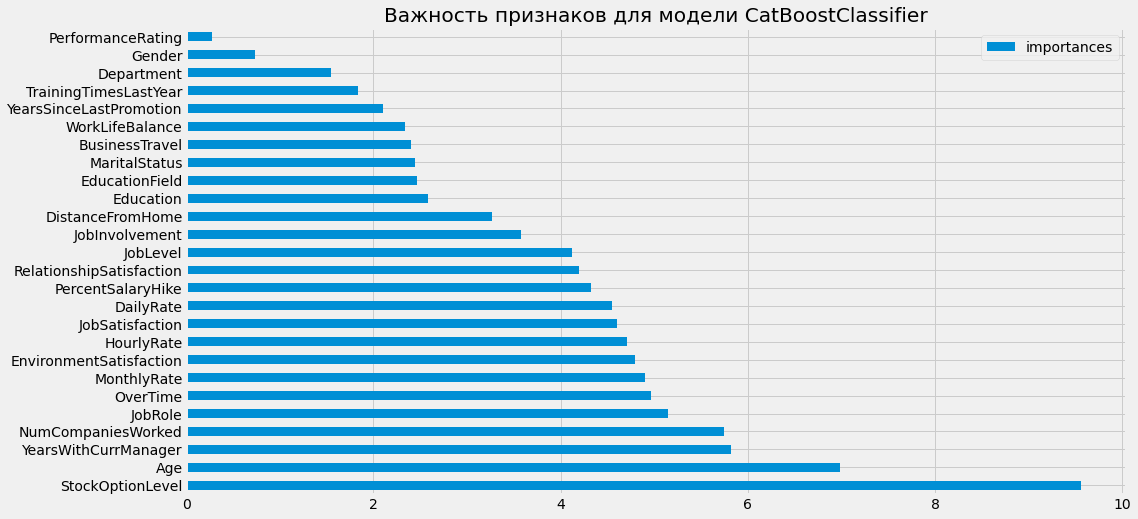

In [ ]:
show_importance(FEATURES=FEATURES, feature_importances = result_catb[1], figsize=(15,8), model_name='CatBoostClassifier')


***PerformanceRating*** вносит уже небольшой вклад, также здесь самое большое влияние на модель оказывает ***StockOptionLevel***

### Сравнение метрик всех моделей

Выясним, является ли различия между скорами трех моделей на кросс-валидации статистически значимыми. Проведем t-тест, нулевая гипотеза, заключается в том, что различия вызваны случайностью, альтернативная, что нет

In [ ]:
model_perfomance_df = pd.DataFrame(index=['CatBoost','XGBClassifier', 'LGBMClassifier'],
                       data=[result_catb[0],result_xgb[0], result_lgbm[0]],
                       columns=[str(i+1) for i in range(N_FOLDS)])
model_perfomance_df

,1,2,3,4,5
CatBoost,0.752203,0.774068,0.815932,0.885424,0.831441
XGBClassifier,0.748220,0.770085,0.801441,0.811356,0.790085
LGBMClassifier,0.727881,0.782797,0.793729,0.811525,0.798898


In [ ]:
import scipy.stats as stats

stats.ttest_rel(result_catb[0], result_lgbm[0])

TtestResult(statistic=2.1745112872790413, pvalue=0.09532774763798682, df=4)

In [ ]:
stats.ttest_rel(result_catb[0], result_xgb[0])

TtestResult(statistic=2.0452606168486835, pvalue=0.11028234252575049, df=4)

Устанавливая порог ***p-value*** **=** ***0.05***. Порог в обоих случаях преодолен, поэтому мы не можем отвергнуть нулевую гипотезу.

## Submission

Предскажем теперь на тестовых данных и сохраним результаты

In [ ]:
model = CatBoostClassifier(**catb_params)
model.fit(train[FEATURES], train[TARGET], verbose=0)
catb_predictions = model.predict_proba(test[FEATURES])[:, 1]

In [ ]:
catb_submission = submission.copy()
catb_submission[TARGET] =catb_predictions
catb_submission.to_csv("catb-subs_v2.csv",index=False)
catb_submission.head()

,id,Attrition
0,1677,0.136094
1,1678,0.022796
2,1679,0.012541
3,1680,0.017610
4,1681,0.326759


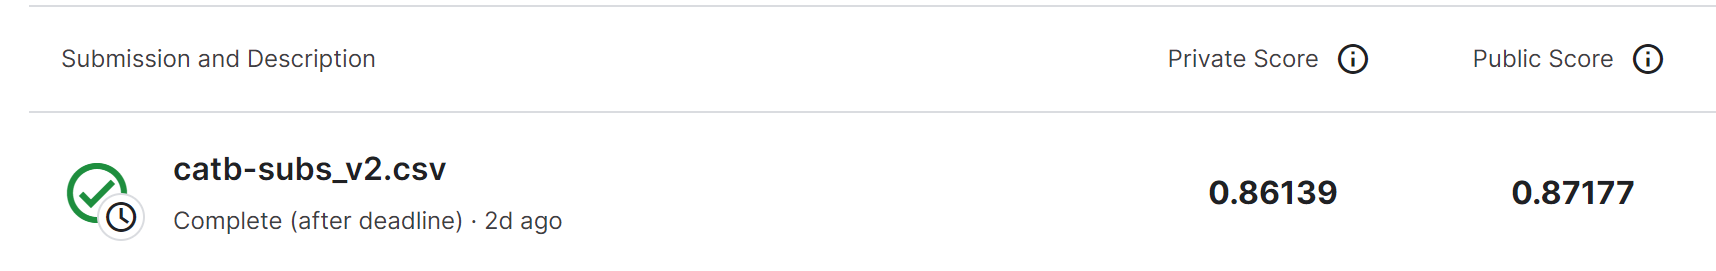